In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/marza/Downloads/survey-lung-cancer.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [3]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
x = data.drop(['LUNG_CANCER'], axis=1)
y = data.LUNG_CANCER
y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [5]:
y = le.fit_transform(y)
x['GENDER'] = le.fit_transform(x['GENDER'])
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 )

In [40]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 5  9]
 [ 4 60]]
performance: 
               precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.87      0.94      0.90        64

    accuracy                           0.83        78
   macro avg       0.71      0.65      0.67        78
weighted avg       0.81      0.83      0.82        78



0.8950892857142859

Text(0.5, 0, 'False Positive Rate')

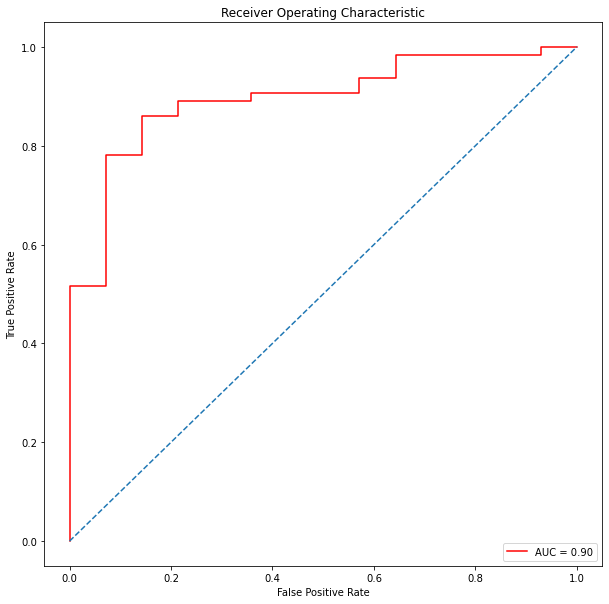

In [8]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [9]:
from sklearn.ensemble import RandomForestClassifier
NB_model = RandomForestClassifier()
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 9  5]
 [ 2 62]]
performance: 
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.93      0.97      0.95        64

    accuracy                           0.91        78
   macro avg       0.87      0.81      0.83        78
weighted avg       0.91      0.91      0.91        78



0.91015625

Text(0.5, 0, 'False Positive Rate')

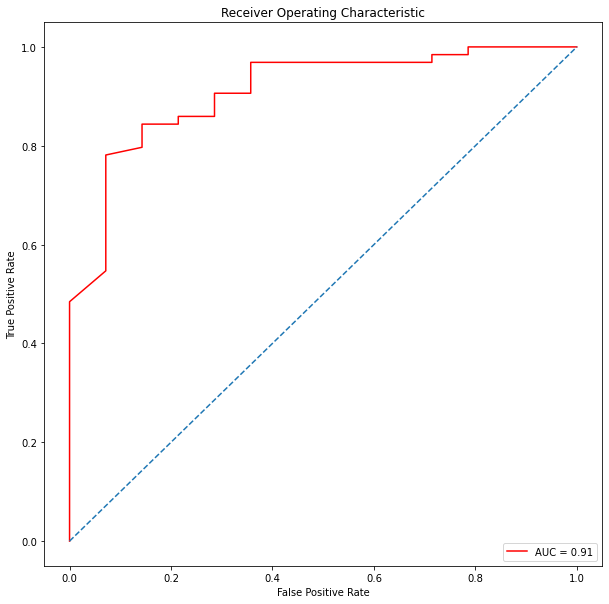

In [10]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [11]:
from sklearn.tree import DecisionTreeClassifier
NB_model = DecisionTreeClassifier()
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 7  7]
 [ 6 58]]
performance: 
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.89      0.91      0.90        64

    accuracy                           0.83        78
   macro avg       0.72      0.70      0.71        78
weighted avg       0.83      0.83      0.83        78



0.703125

Text(0.5, 0, 'False Positive Rate')

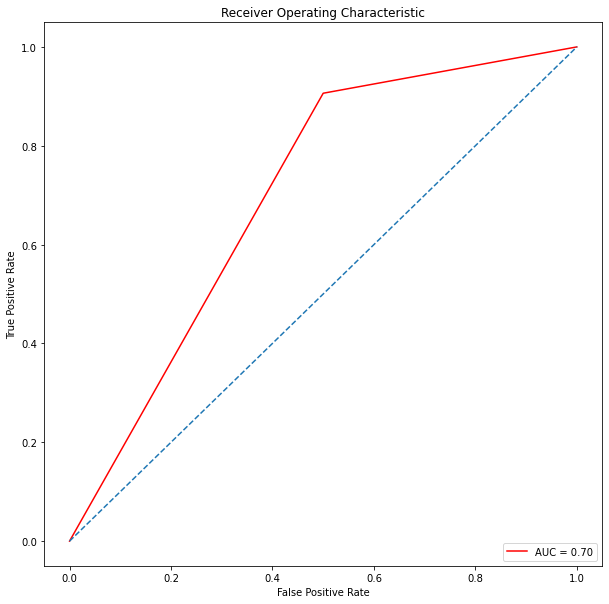

In [12]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [13]:
from sklearn.svm import SVC

In [14]:
NB_model = SVC(probability=True)
NB_classifier = NB_model.fit(x_train, y_train)
NB_prediction = NB_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 0 14]
 [ 0 64]]
performance: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.82      1.00      0.90        64

    accuracy                           0.82        78
   macro avg       0.41      0.50      0.45        78
weighted avg       0.67      0.82      0.74        78



C:\Users\marza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.09486607142857142

Text(0.5, 0, 'False Positive Rate')

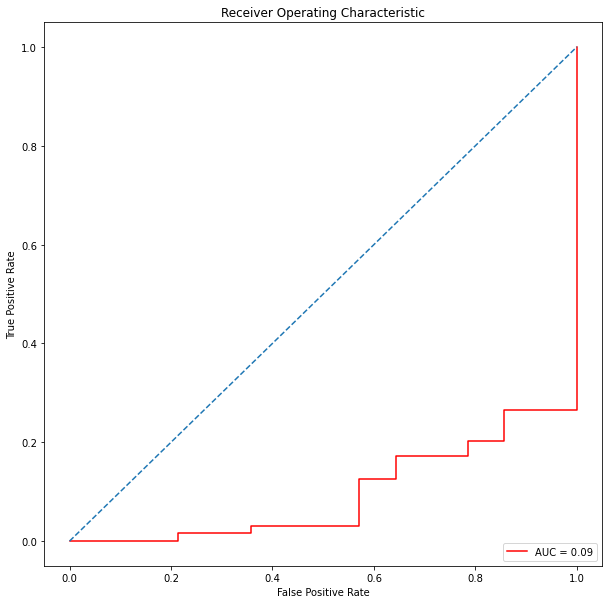

In [15]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
NB_prediction = model.predict(x_test)
CM = confusion_matrix(y_test, NB_prediction)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, NB_prediction)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 2 12]
 [ 1 63]]
performance: 
               precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.84      0.98      0.91        64

    accuracy                           0.83        78
   macro avg       0.75      0.56      0.57        78
weighted avg       0.81      0.83      0.79        78



0.734375

Text(0.5, 0, 'False Positive Rate')

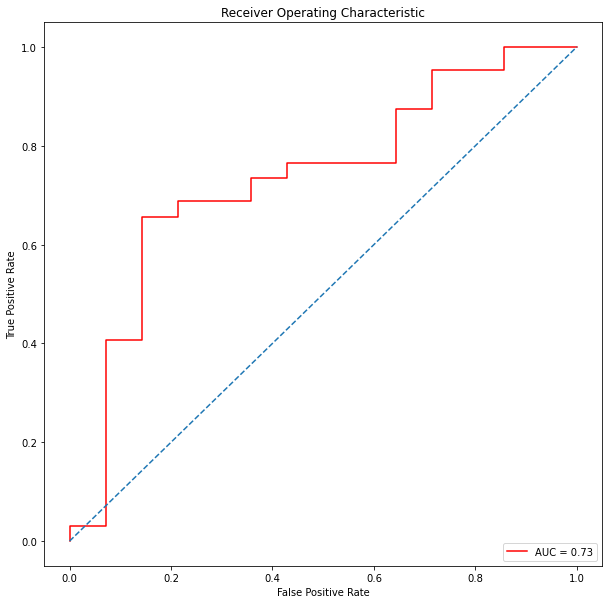

In [17]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
model = KMeans(n_clusters=2, random_state=0).fit(x_train)
N = model.predict(x_test)
CM = confusion_matrix(y_test, N)
print("confusion matrix:\n", CM)
CR=classification_report(y_test, N)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

confusion matrix:
 [[ 3 11]
 [26 38]]
performance: 
               precision    recall  f1-score   support

           0       0.10      0.21      0.14        14
           1       0.78      0.59      0.67        64

    accuracy                           0.53        78
   macro avg       0.44      0.40      0.41        78
weighted avg       0.65      0.53      0.58        78



AttributeError: 'KMeans' object has no attribute 'predict_proba'

Text(0.5, 0, 'False Positive Rate')

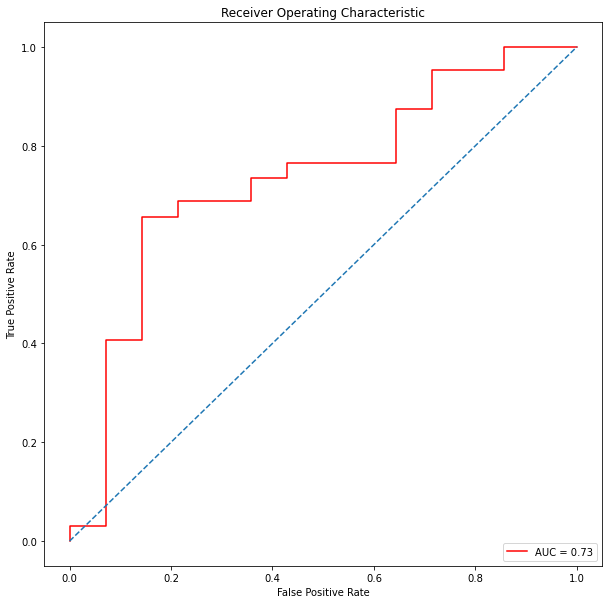

In [20]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [21]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [22]:
data.keys()

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

<AxesSubplot:>

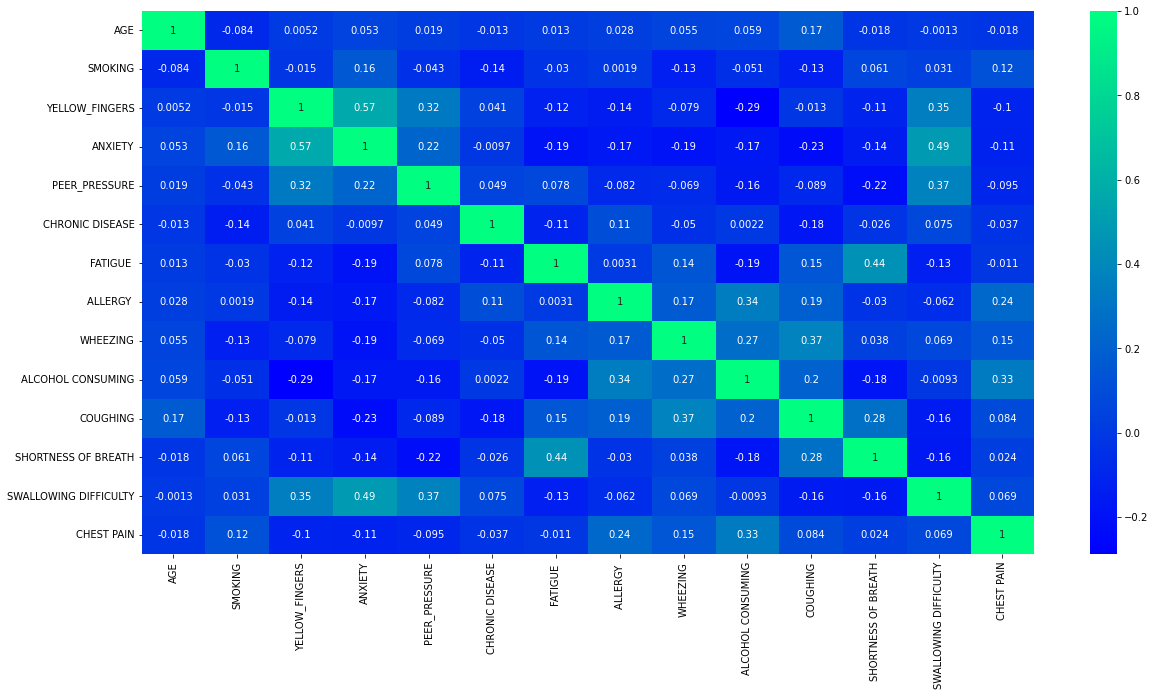

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap = "winter")

In [24]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
print(scaled_x)

[[ 0.95257934  0.77185028 -1.13529242 ...  0.74873631  1.06350105
   0.892475  ]
 [ 0.95257934  1.38182914  0.88083033 ...  0.74873631  1.06350105
   0.892475  ]
 [-1.04978132 -0.44810745 -1.13529242 ...  0.74873631 -0.94029056
   0.892475  ]
 ...
 [ 0.95257934 -0.57010322  0.88083033 ... -1.33558369 -0.94029056
   0.892475  ]
 [ 0.95257934  0.52785873  0.88083033 ...  0.74873631 -0.94029056
   0.892475  ]
 [ 0.95257934 -0.08212013 -1.13529242 ... -1.33558369  1.06350105
  -1.12047956]]


In [26]:
pca = PCA(n_components=8)
pca.fit(scaled_x)
pca_x = pca.transform(scaled_x)
pca_x.shape

(309, 8)

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
#Support Vector Machine (SVM)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(pca_x, y)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.855 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ....C=1000, gam

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
#Support Vector Machine (SVM)
svm = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svm_y_pre = cross_val_predict(svm, pca_x, y, cv=9)
svm_sc = accuracy_score(y, svm_y_pre) * 100
svm_sc = "{:.2f}".format(svm_sc)
print(svm_sc)
CM = confusion_matrix(y, svm_y_pre)
print("confusion matrix:\n", CM)
CR=classification_report(y, svm_y_pre)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

92.23
confusion matrix:
 [[ 26  13]
 [ 11 259]]
performance: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.95      0.96      0.96       270

    accuracy                           0.92       309
   macro avg       0.83      0.81      0.82       309
weighted avg       0.92      0.92      0.92       309



0.10491071428571429

Text(0.5, 0, 'False Positive Rate')

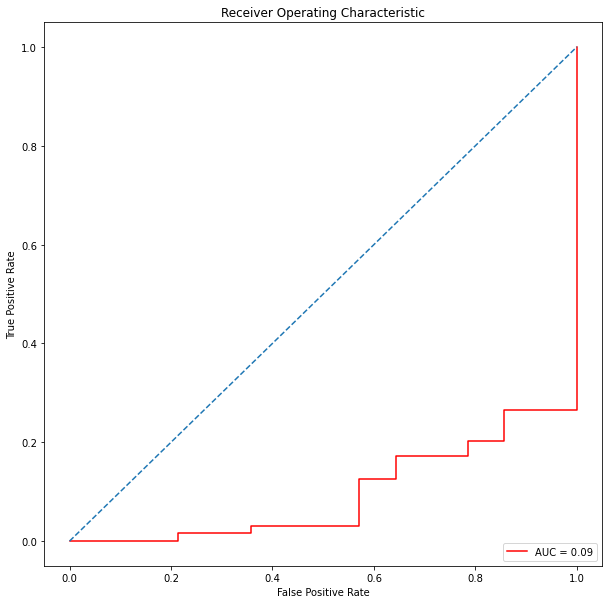

In [29]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
#Random Forest
rf = RandomForestClassifier(criterion='entropy', random_state = 0)
rf_y_pre = cross_val_predict(rf, pca_x, y, cv=9)
rf_sc = accuracy_score(y, rf_y_pre) * 100
rf_sc = "{:.2f}".format(rf_sc)
print(rf_sc)
CM = confusion_matrix(y, rf_y_pre)
print("confusion matrix:\n", CM)
CR=classification_report(y, rf_y_pre)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

90.29
confusion matrix:
 [[ 19  20]
 [ 10 260]]
performance: 
               precision    recall  f1-score   support

           0       0.66      0.49      0.56        39
           1       0.93      0.96      0.95       270

    accuracy                           0.90       309
   macro avg       0.79      0.73      0.75       309
weighted avg       0.89      0.90      0.90       309



0.8950892857142859

Text(0.5, 0, 'False Positive Rate')

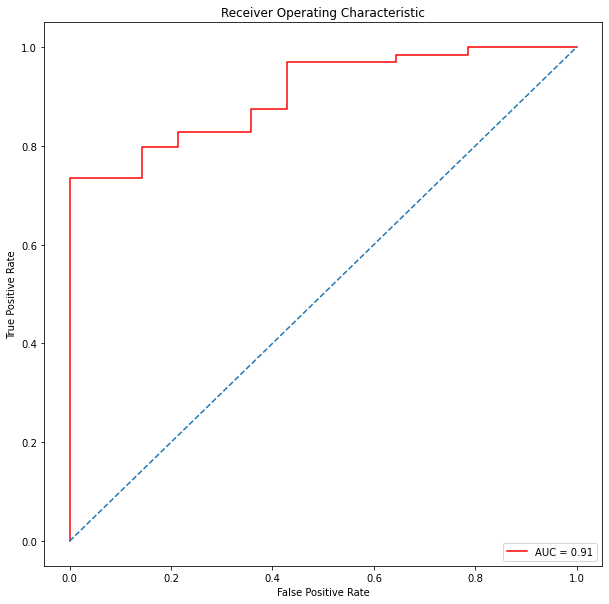

In [31]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
#NB
nb = GaussianNB()
nb_y_pre = cross_val_predict(nb, pca_x, y, cv=9)
nb_sc = accuracy_score(y, nb_y_pre) * 100
nb_sc = "{:.2f}".format(nb_sc)
print(nb_sc)
CM = confusion_matrix(y, nb_y_pre)
print("confusion matrix:\n", CM)
CR=classification_report(y, nb_y_pre)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

91.59
confusion matrix:
 [[ 21  18]
 [  8 262]]
performance: 
               precision    recall  f1-score   support

           0       0.72      0.54      0.62        39
           1       0.94      0.97      0.95       270

    accuracy                           0.92       309
   macro avg       0.83      0.75      0.79       309
weighted avg       0.91      0.92      0.91       309



0.10491071428571429

Text(0.5, 0, 'False Positive Rate')

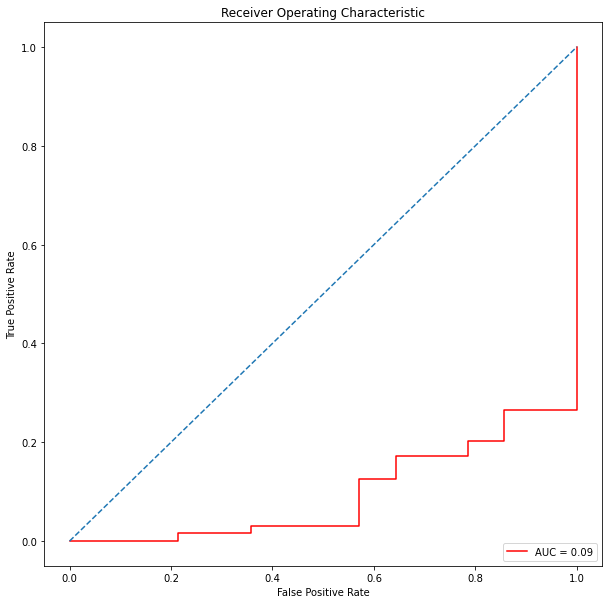

In [33]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
#D_tree
dt = DecisionTreeClassifier()
dt_y_pre = cross_val_predict(dt, pca_x, y, cv=9)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)
CM = confusion_matrix(y, dt_y_pre)
print("confusion matrix:\n", CM)
CR=classification_report(y, dt_y_pre)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

89.00
confusion matrix:
 [[ 22  17]
 [ 17 253]]
performance: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56        39
           1       0.94      0.94      0.94       270

    accuracy                           0.89       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.89      0.89      0.89       309



0.10491071428571429

Text(0.5, 0, 'False Positive Rate')

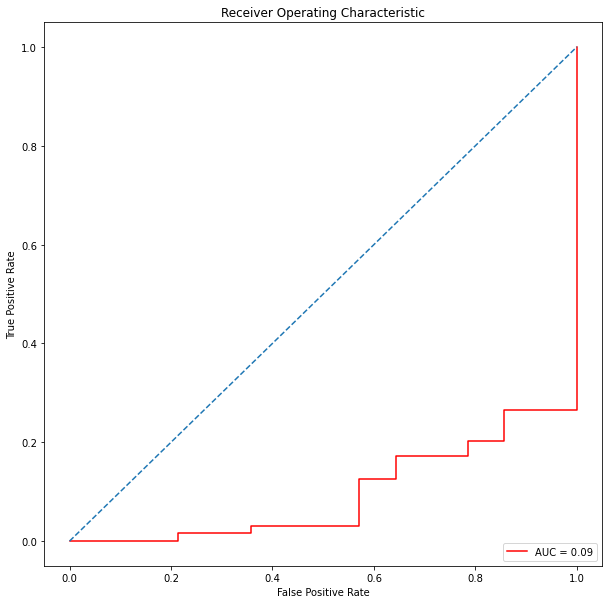

In [35]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
dt = LogisticRegression()
dt_y_pre = cross_val_predict(dt, pca_x, y, cv=9)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)
CM = confusion_matrix(y, dt_y_pre)
print("confusion matrix:\n", CM)
CR=classification_report(y, dt_y_pre)
print("performance: \n", CR)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

90.61
confusion matrix:
 [[ 21  18]
 [ 11 259]]
performance: 
               precision    recall  f1-score   support

           0       0.66      0.54      0.59        39
           1       0.94      0.96      0.95       270

    accuracy                           0.91       309
   macro avg       0.80      0.75      0.77       309
weighted avg       0.90      0.91      0.90       309



0.10491071428571429

Text(0.5, 0, 'False Positive Rate')

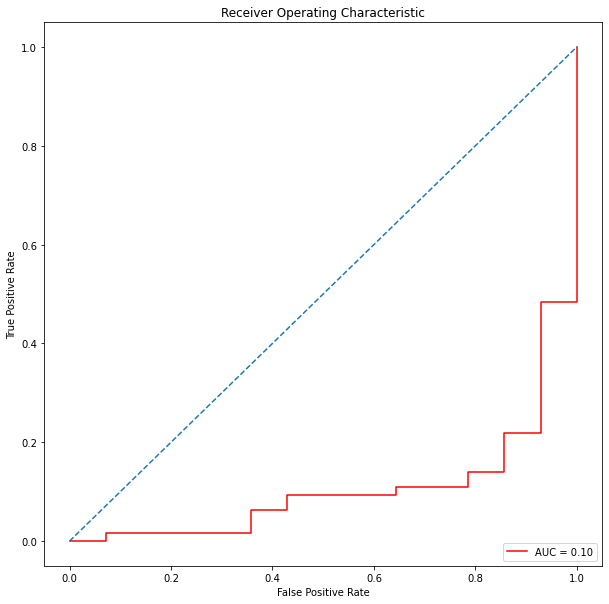

In [48]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
dt = KMeans(n_clusters=2, random_state=0)
dt_y_pre = cross_val_predict(dt, pca_x, y, cv=9)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)
from sklearn.metrics import roc_curve, auc
y_prob = NB_model.predict_proba(x_test)[:,0]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

52.75


0.09486607142857142